In [85]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
MODEL = "DeepSeek-V3"
SCORES_PATH = "scores/scores_{}_{}.csv"

In [14]:
scores = [pd.read_csv(SCORES_PATH.format(MODEL, i)).set_index("Unnamed: 0", drop=True) for i in range(3)]

In [ ]:
all_codes = set()
for i in range(0, len(scores)):
    all_codes = all_codes.union(set(scores[i].index.to_list()))
all_codes = sorted(list(all_codes))

template = pd.DataFrame(data = np.zeros((len(all_codes), len(all_codes))), index=sorted(list(all_codes)), columns=sorted(list(all_codes)))
scores_all_codes = [template.copy() for _ in range(len(scores))]
for i in range(len(scores)):
    index = scores[i].index.to_list()
    scores_all_codes[i].loc[index, index] = scores[i].loc[index, index]

In [73]:
scores_all_codes_mean = pd.DataFrame(
    data = np.stack([scores_all_codes[i].values for i in range(len(scores_all_codes))]).mean(axis=0),
    index = all_codes,
    columns = all_codes
)
scores_all_codes_std = pd.DataFrame(
    data = np.stack([scores_all_codes[i].values for i in range(len(scores_all_codes))]).std(axis=0),
    index = all_codes,
    columns = all_codes
)

In [79]:
np.histogram(scores_all_codes_mean.values.flatten(), bins=10)

(array([3951024,  115388,       0,   51588,       0,   53864,    8062,
              0,    3560,    2630]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [86]:
if not os.path.exists("scores/"): os.makedirs("scores/")
scores_all_codes_mean.to_csv(f"scores/scores_{MODEL}_mean.csv")

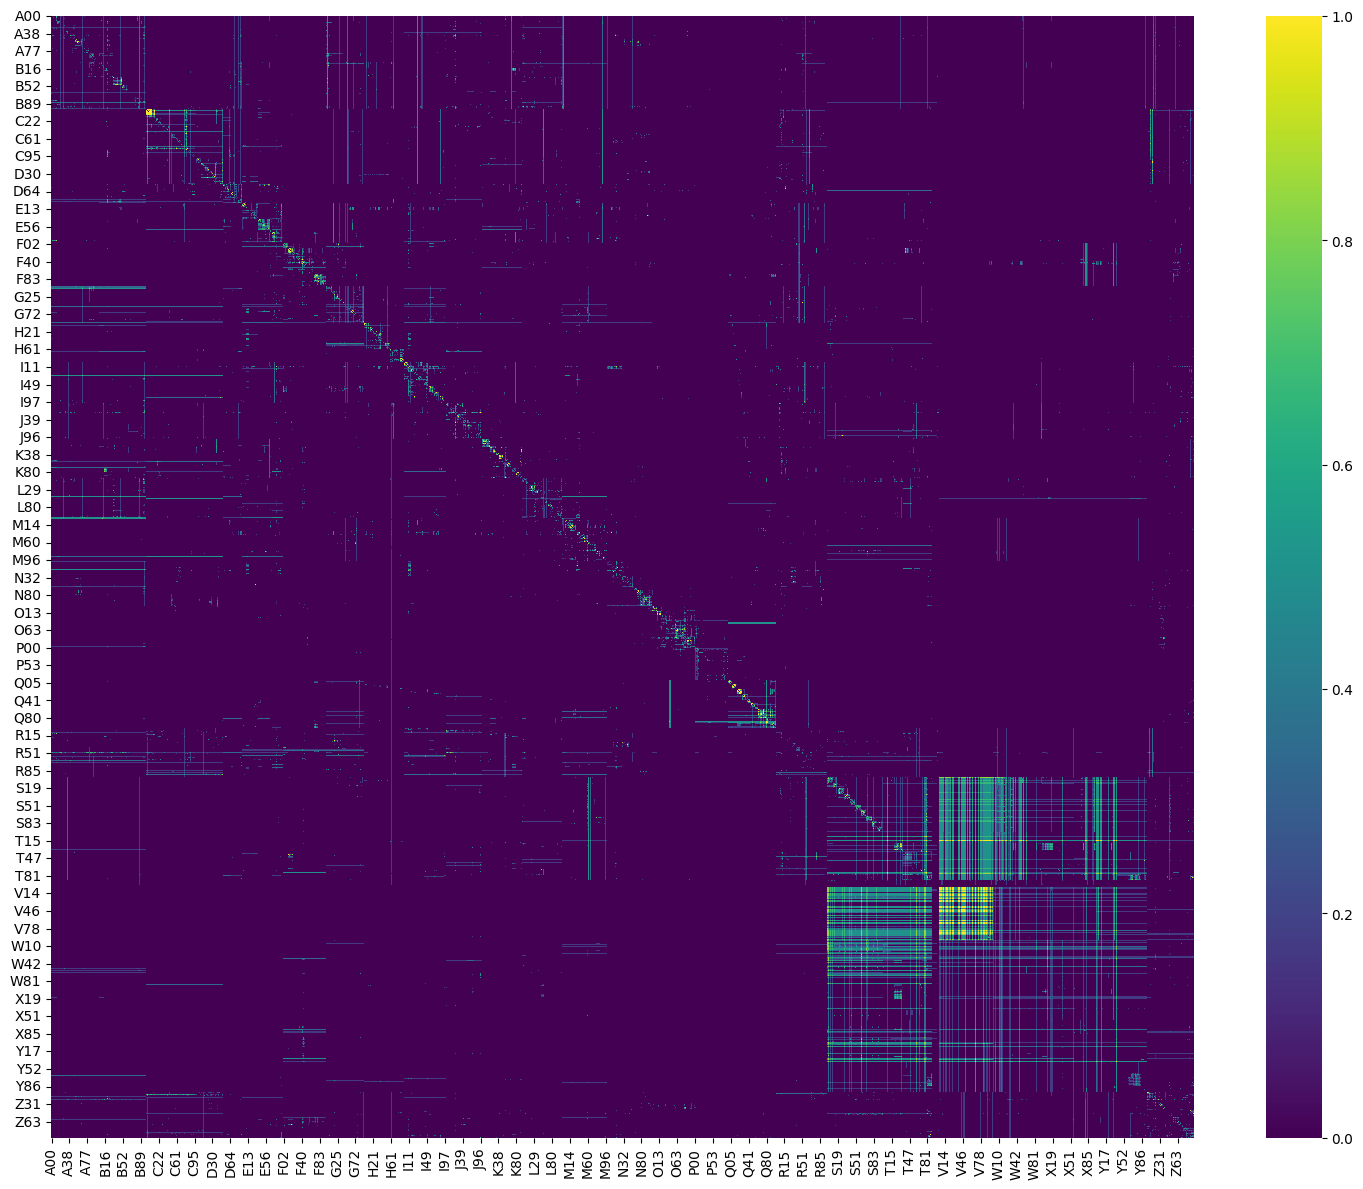

In [87]:
plt.figure(figsize=(15, 12))
sns.heatmap(scores_all_codes_mean, cmap ='viridis')
plt.tight_layout()
if not os.path.exists("pics/"): os.makedirs("pics/")
plt.savefig(f"pics/{MODEL}_mean.png", dpi=300, bbox_inches='tight')
plt.show()

In [89]:
if not os.path.exists("scores/"): os.makedirs("scores/")
scores_all_codes_std.to_csv(f"scores/scores_{MODEL}_std.csv")

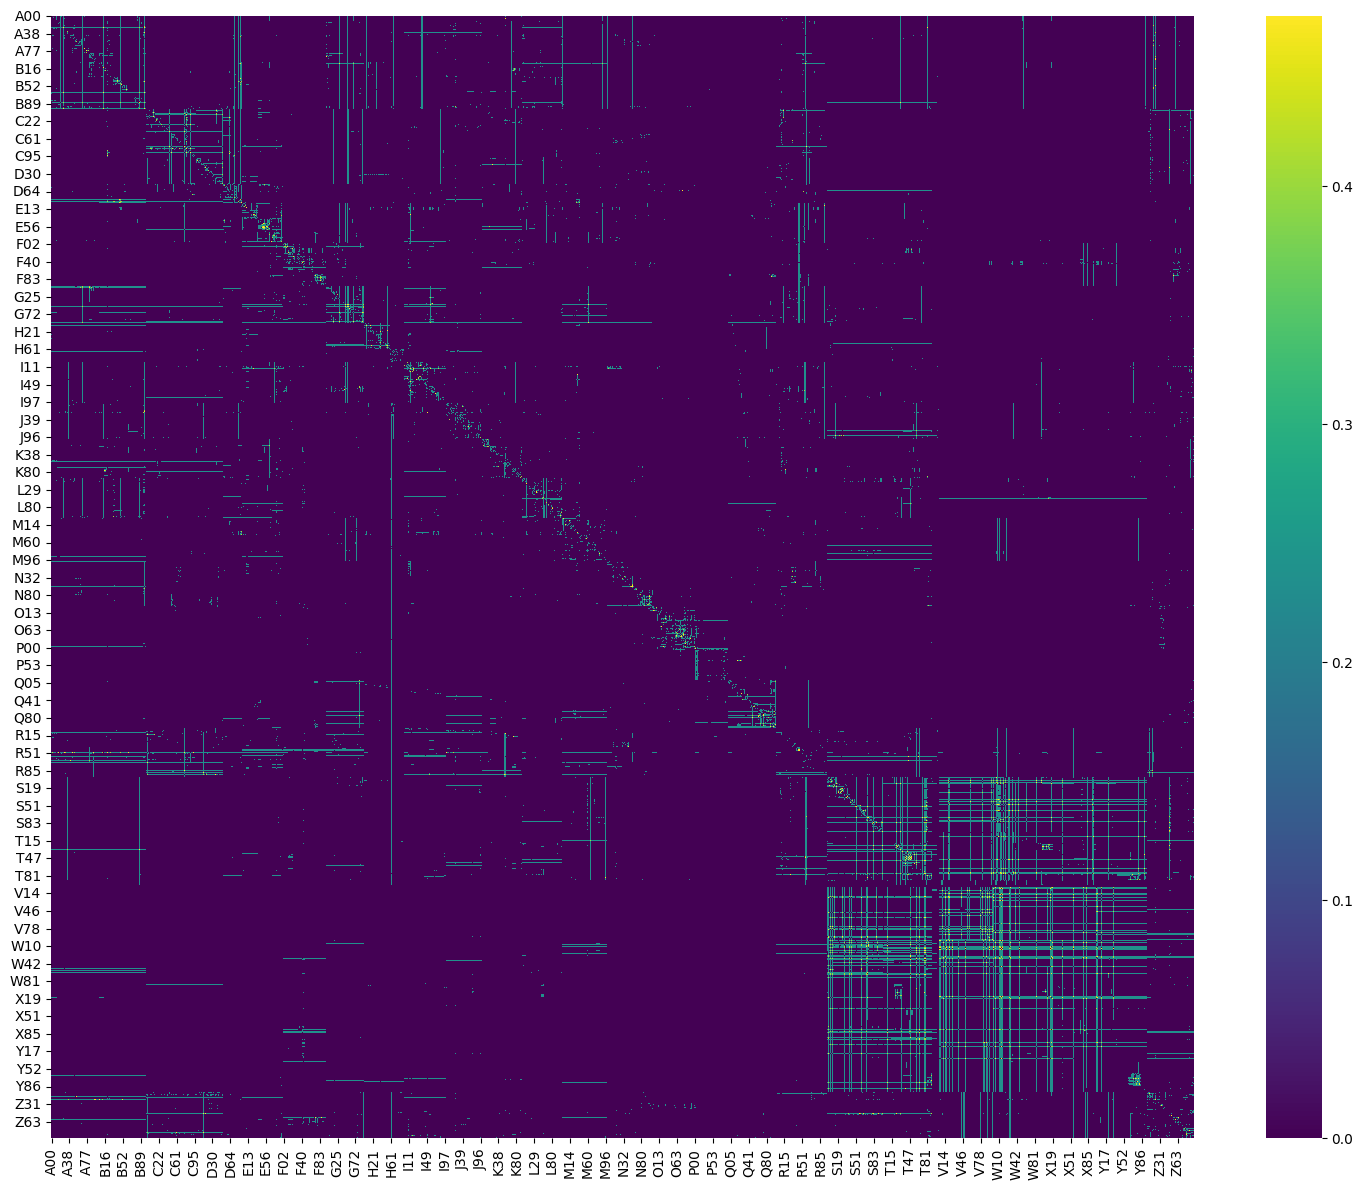

In [90]:
plt.figure(figsize=(15, 12))
sns.heatmap(scores_all_codes_std, cmap ='viridis')
plt.tight_layout()
if not os.path.exists("pics/"): os.makedirs("pics/")
plt.savefig(f"pics/{MODEL}_std.png", dpi=300, bbox_inches='tight')
plt.show()